# Recommender Dataset

In this analysis, we use the MovieLens dataset, as described in Harper and Konstan (2015). It consists of:
- 100,000 ratings (1-5) from 943 users on 1682 movies

- Each user has rated at least 20 movies

- Simple demographic info for the users (age, gender, occupation, zip)

## Review of the files

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ratings (u.data)
Information about which user rated which movie with what rating.

In [169]:
ratings_df = pd.read_csv('data/ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

In [170]:
ratings_df.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [171]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    100000 non-null  int64         
 1   movie_id   100000 non-null  int64         
 2   rating     100000 non-null  int64         
 3   timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.1 MB


There are no missing values for the ratings.

### Movies: (u.item)
Extensive information about each movie.

In [172]:
movie_columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action',
                 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies_df = pd.read_csv('data/ml-100k/u.item', sep='|', names=movie_columns, encoding='latin-1')

In [173]:
movies_df.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [174]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

**video_release_date** seems to be completely missing, so we can immediately drop the feature.

Two values for **ImDb_URL** are missing. This is not a problem since the feature does not have any value for the prediction and we will drop it later.

One value for **release_date** is missing.


In [175]:
movies_df[movies_df['release_date'].isna()]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
ratings_df[ratings_df['movie_id'] == 267]

,user_id,movie_id,rating,timestamp
2172,130,267,5,1997-10-02 14:07:19
3781,5,267,4,1997-09-30 15:57:44
7245,268,267,3,1997-10-01 21:41:17
12475,297,267,3,1997-09-28 01:12:19
14756,319,267,4,1997-10-01 12:08:10
15292,1,267,4,1997-10-01 08:02:35
49295,532,267,3,1997-09-28 10:09:08
93523,833,267,1,1997-09-30 21:41:09
99723,422,267,4,1997-09-30 21:46:26


In [177]:
movies_df = movies_df[movies_df['movie_id'] != 267]
ratings_df = ratings_df[ratings_df['movie_id'] != 267]

Since there is absolutely no information about the movie 267, we just manually drop it and the 9 corresponding ratings.

### Users (u.user)
Demographic information about each user.

In [178]:
users_df = pd.read_csv('data/ml-100k/u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

In [179]:
users_df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [180]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


There are no missing values for the users.

## Exploratory Data Analysis (EDA)

For convenience and visually appealing figures, we use `seaborn`.

### Distribution of Ratings

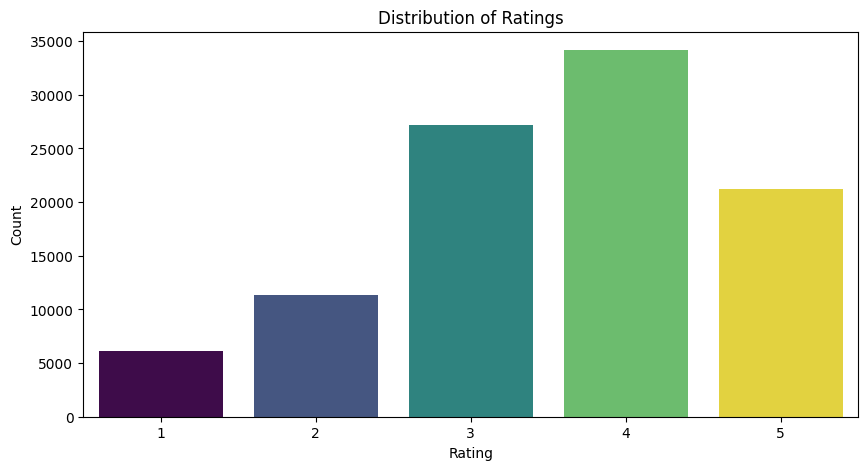

In [181]:
plt.figure(figsize=(10, 5))
sns.countplot(data=ratings_df, x='rating', hue='rating', palette='viridis', legend=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Number of Ratings per User

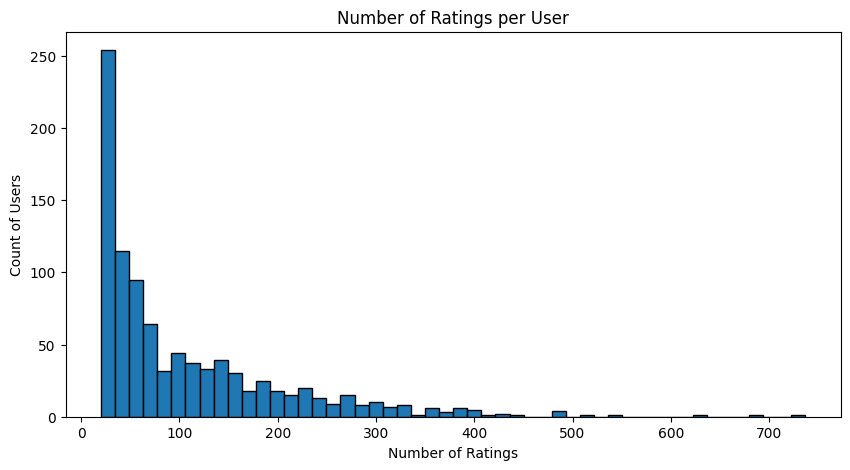

In [182]:
plt.figure(figsize=(10, 5))
plt.hist(ratings_df['user_id'].value_counts(), bins=50, edgecolor='black')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.show()

### Number of Ratings per Movie

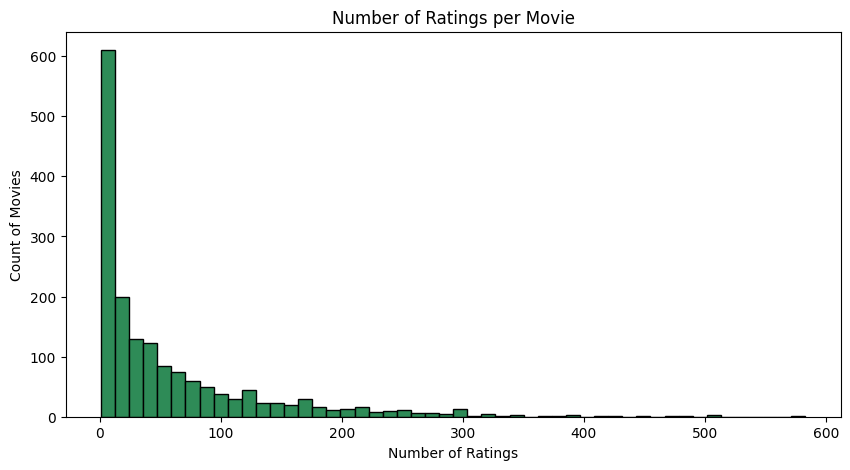

In [183]:
plt.figure(figsize=(10, 5))
plt.hist(ratings_df['movie_id'].value_counts(), bins=50, color='seagreen', edgecolor='black')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Movies')
plt.show()

### User Age Distribution

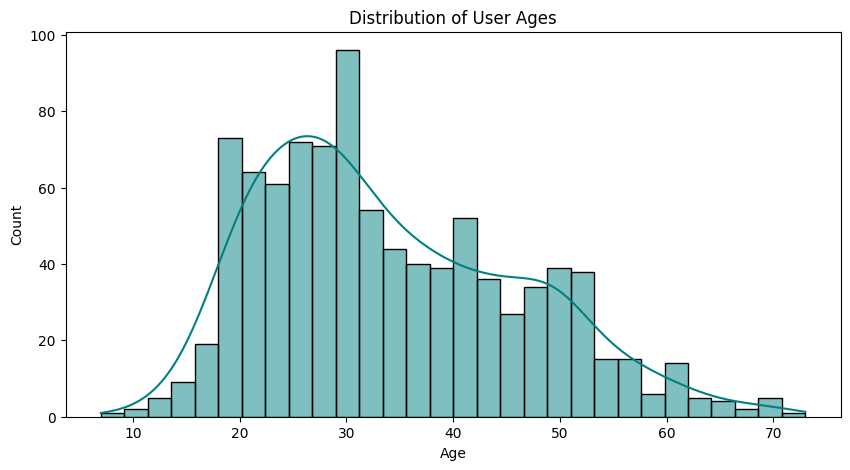

In [184]:
plt.figure(figsize=(10, 5))
sns.histplot(users_df['age'], bins=30, color='teal', kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Gender Distribution

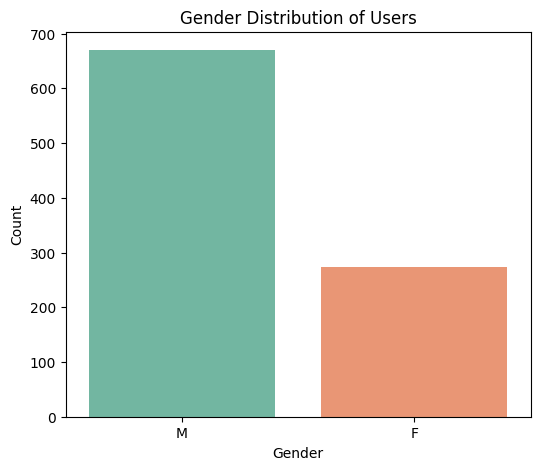

In [185]:
plt.figure(figsize=(6, 5))
sns.countplot(data=users_df, x='gender', hue='gender', palette='Set2', legend=False)
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Occupation Distribution

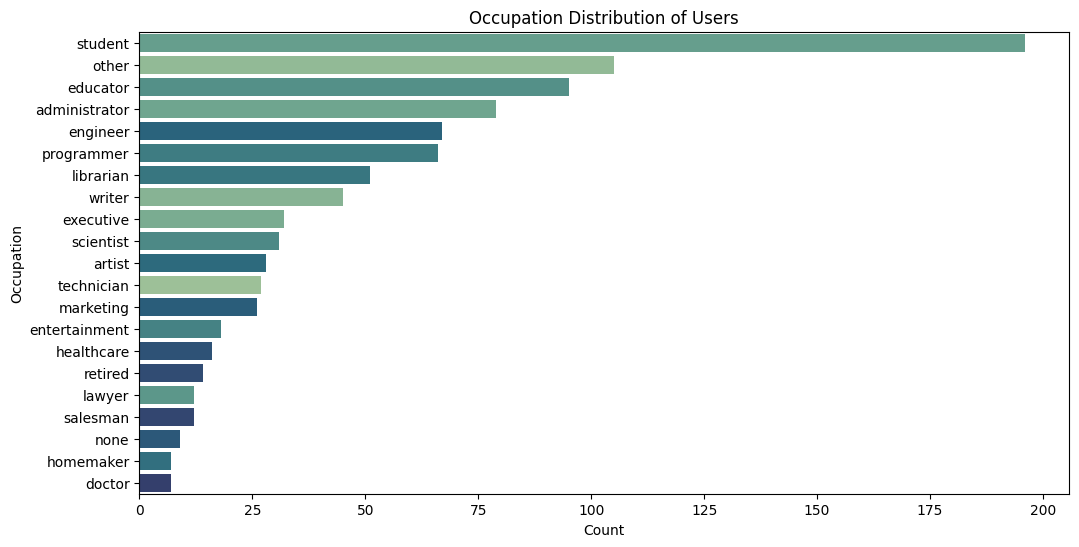

In [186]:
plt.figure(figsize=(12, 6))
sns.countplot(data=users_df, y='occupation', hue='occupation', order=users_df['occupation'].value_counts().index,
              palette='crest', legend=False)
plt.title('Occupation Distribution of Users')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

### Popular Movie Genres

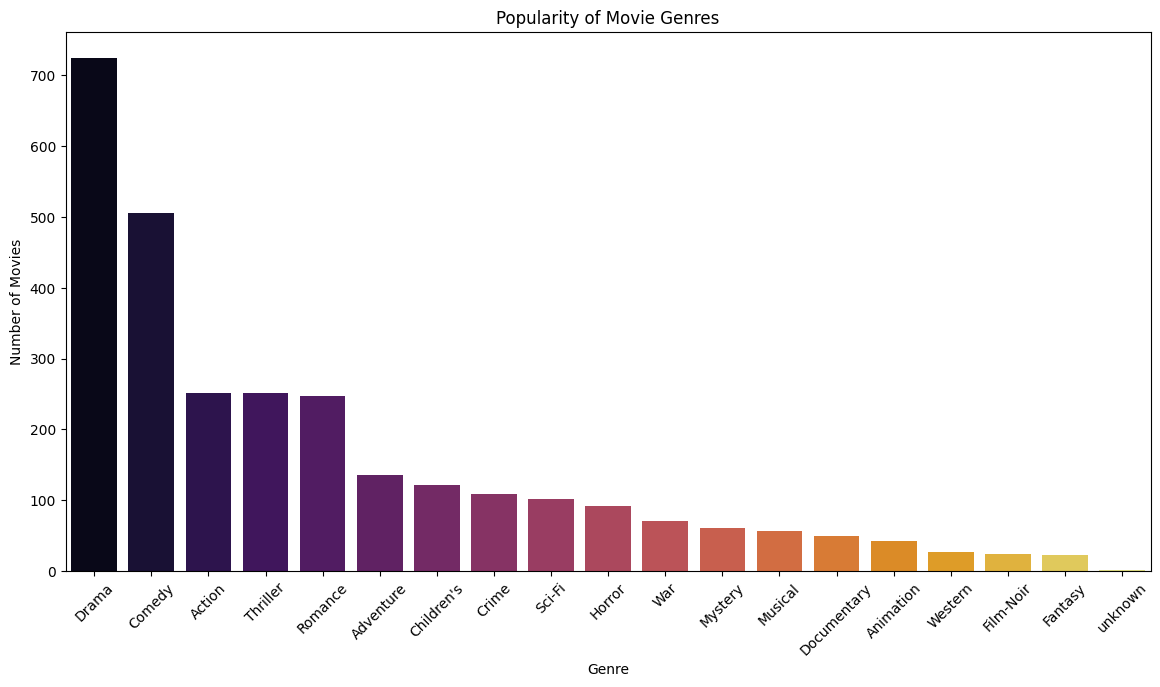

In [187]:
genre_columns = movie_columns[5:]
genre_totals = movies_df[genre_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
sns.barplot(x=genre_totals.index, y=genre_totals.values, hue=genre_totals.index, dodge=False, palette='inferno', legend=False)
plt.title('Popularity of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

## Summary of the Analysis

# References
Harper, F. M., & Konstan, J. A. (2015). *The MovieLens Datasets: History and Context*. ACM Transactions on Interactive Intelligent Systems (TiiS), 5(4), Article 19. DOI: [10.1145/2827872](http://dx.doi.org/10.1145/2827872)
